# VisDrone2019 Dataset

In [16]:
import collections
from csv import DictReader
from pathlib import Path
from pprint import pprint
import tempfile
from typing import Any, Callable, Generator, Union

import datasets
import pandas as pd

In [2]:
visdrone_root = Path('/tmp/visdrone2019')

!ls -l $visdrone_root

total 0
drwxr-xr-x@ 5 etienne.deprit  wheel  160 Dec 22 16:32 VisDrone2019-DET-test-dev
drwxr-xr-x@ 5 etienne.deprit  wheel  160 Dec 22 16:33 VisDrone2019-DET-train
drwxr-xr-x@ 5 etienne.deprit  wheel  160 Dec 22 16:33 VisDrone2019-DET-val


In [3]:
visdrone_train_path = visdrone_root / Path('VisDrone2019-DET-train')
visdrone_val_path = visdrone_root / Path('VisDrone2019-DET-val')
visdrone_test_path = visdrone_root / Path('VisDrone2019-DET-test-dev')

SPLITS = {
    datasets.Split.TRAIN: visdrone_train_path,
    datasets.Split.VALIDATION: visdrone_val_path,
    datasets.Split.TEST: visdrone_test_path
}

In [4]:
!ls -l $visdrone_train_path/annotations | head -n 4
!ls -l $visdrone_train_path/images | head -n 4

total 52912
-rw-r--r--@ 1 etienne.deprit  wheel   1982 Dec 22 16:33 0000002_00005_d_0000014.txt
-rw-r--r--@ 1 etienne.deprit  wheel   2188 Dec 22 16:33 0000002_00448_d_0000015.txt
-rw-r--r--@ 1 etienne.deprit  wheel   1283 Dec 22 16:33 0000003_00231_d_0000016.txt
ls: stdout: Undefined error: 0
total 3049112
-rw-r--r--@ 1 etienne.deprit  wheel   98691 Dec 22 16:33 0000002_00005_d_0000014.jpg
-rw-r--r--@ 1 etienne.deprit  wheel  100183 Dec 22 16:32 0000002_00448_d_0000015.jpg
-rw-r--r--@ 1 etienne.deprit  wheel  105757 Dec 22 16:32 0000003_00231_d_0000016.jpg
ls: stdout: Undefined error: 0


In [5]:
annotations = list((visdrone_val_path / Path('annotations')).glob('*.txt'))
pprint(annotations[:5])

[PosixPath('/tmp/visdrone2019/VisDrone2019-DET-val/annotations/0000327_03601_d_0000729.txt'),
 PosixPath('/tmp/visdrone2019/VisDrone2019-DET-val/annotations/0000295_00800_d_0000025.txt'),
 PosixPath('/tmp/visdrone2019/VisDrone2019-DET-val/annotations/0000271_00601_d_0000377.txt'),
 PosixPath('/tmp/visdrone2019/VisDrone2019-DET-val/annotations/0000289_02401_d_0000823.txt'),
 PosixPath('/tmp/visdrone2019/VisDrone2019-DET-val/annotations/0000249_02900_d_0000009.txt')]


In [6]:
sample_annotations = str(annotations[0])

!head -n 10 $sample_annotations

503,73,24,11,1,4,0,0
504,87,31,16,1,5,0,1
524,94,23,12,1,4,0,1
492,100,29,15,1,4,0,1
459,131,31,19,1,5,0,1
493,131,39,23,1,6,0,1
560,45,19,18,1,9,0,0
586,83,12,13,1,4,0,0
606,86,15,13,1,4,0,0
639,89,30,25,0,0,0,0


### Categories
```
    categories[{
        "id": int,
        "name": str
    }]
```

In [8]:
CATEGORIES = [
    'ignored',
    'pedestrian',
    'people',
    'bicycle',
    'car',
    'van',
    'truck',
    'tricycle',
    'awning-tricycle',
    'bus',
    'motor',
    'other'
]

pprint(CATEGORIES)

['ignored',
 'pedestrian',
 'people',
 'bicycle',
 'car',
 'van',
 'truck',
 'tricycle',
 'awning-tricycle',
 'bus',
 'motor',
 'other']


### Annotations
```
    annotation{
        "id": int,
        "bbox": [x,y,width,height],
        "category_id": int,
        "category": str,
        "truncation": int,
        "occlusion": int
    }
```

In [9]:
ANNOTATION_FIELDS = [
    'x',
    'y',
    'width',
    'height',
    'score',
    'category_id',
    'truncation',
    'occlusion'
]

def load_annotations(path: Path) -> list[dict[str, object]]:
    with open(path, 'r') as f:
        reader = DictReader(f, fieldnames=ANNOTATION_FIELDS)
        annotations = []
        for id, row in enumerate(reader):
            category_id = int(row['category_id'])
            annotation = {
                'id': id,
                'bbox': list(map(float, [row[k] for k in ANNOTATION_FIELDS[:4]])),
                'category_id': category_id,
                'category': CATEGORIES[category_id],
                'truncation': row['truncation'],
                'occlusion': row['occlusion']
            }
            annotations.append(annotation)
        return annotations

In [10]:
load_annotations(annotations[0])

[{'id': 0,
  'bbox': [503.0, 73.0, 24.0, 11.0],
  'category_id': 4,
  'category': 'car',
  'truncation': '0',
  'occlusion': '0'},
 {'id': 1,
  'bbox': [504.0, 87.0, 31.0, 16.0],
  'category_id': 5,
  'category': 'van',
  'truncation': '0',
  'occlusion': '1'},
 {'id': 2,
  'bbox': [524.0, 94.0, 23.0, 12.0],
  'category_id': 4,
  'category': 'car',
  'truncation': '0',
  'occlusion': '1'},
 {'id': 3,
  'bbox': [492.0, 100.0, 29.0, 15.0],
  'category_id': 4,
  'category': 'car',
  'truncation': '0',
  'occlusion': '1'},
 {'id': 4,
  'bbox': [459.0, 131.0, 31.0, 19.0],
  'category_id': 5,
  'category': 'van',
  'truncation': '0',
  'occlusion': '1'},
 {'id': 5,
  'bbox': [493.0, 131.0, 39.0, 23.0],
  'category_id': 6,
  'category': 'truck',
  'truncation': '0',
  'occlusion': '1'},
 {'id': 6,
  'bbox': [560.0, 45.0, 19.0, 18.0],
  'category_id': 9,
  'category': 'bus',
  'truncation': '0',
  'occlusion': '0'},
 {'id': 7,
  'bbox': [586.0, 83.0, 12.0, 13.0],
  'category_id': 4,
  'categor

In [11]:
def load_samples(root: Path) -> Generator[dict, None, None]:
    images = (root / Path('annotations')).glob('*.txt')
    images_root = root / Path('images')
    for id, image in enumerate(images):
        annotations = load_annotations(image)
        sample = {
            'image_id': id,
            'file_name': image.name,
            'image': str(images_root / image.with_suffix('.jpg').name),
            'objects': load_annotations(image)
        }
        yield sample

In [12]:
pprint(list(load_samples(visdrone_val_path))[0])

{'file_name': '0000327_03601_d_0000729.txt',
 'image': '/tmp/visdrone2019/VisDrone2019-DET-val/images/0000327_03601_d_0000729.jpg',
 'image_id': 0,
 'objects': [{'bbox': [503.0, 73.0, 24.0, 11.0],
              'category': 'car',
              'category_id': 4,
              'id': 0,
              'occlusion': '0',
              'truncation': '0'},
             {'bbox': [504.0, 87.0, 31.0, 16.0],
              'category': 'van',
              'category_id': 5,
              'id': 1,
              'occlusion': '1',
              'truncation': '0'},
             {'bbox': [524.0, 94.0, 23.0, 12.0],
              'category': 'car',
              'category_id': 4,
              'id': 2,
              'occlusion': '1',
              'truncation': '0'},
             {'bbox': [492.0, 100.0, 29.0, 15.0],
              'category': 'car',
              'category_id': 4,
              'id': 3,
              'occlusion': '1',
              'truncation': '0'},
             {'bbox': [459.0, 131.0, 31

In [13]:
FEATURES = datasets.Features(
    {
        'image_id': datasets.Value('int64'),
        'file_name': datasets.Value('string'),
        'image': datasets.Image(),
        'objects': datasets.Sequence(
            {
                'id': datasets.Value('int64'),
                'bbox': datasets.Sequence(datasets.Value('float32'), length=4),
                'category_id': datasets.Value('int32'),
                'category': datasets.ClassLabel(names=CATEGORIES),
                'truncation': datasets.Value('int32'),
                'occlusion': datasets.Value('int32'),
            }
        ),
    }
)

In [17]:
def load_split(generator: Callable[[Path], Generator[dict, None, None]], split:Path, features=FEATURES) -> datasets.Dataset:
    return datasets.Dataset.from_generator(
        generator=generator,
        features=features,
        gen_kwargs={'root': str(split)}
    )

def load_dataset(splits: dict) -> datasets.DatasetDict:
    ds = datasets.DatasetDict({str(split): load_split(load_samples, root) for split, root in splits.items()})
    return ds

In [18]:
visdrone_ds = load_dataset(SPLITS)

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

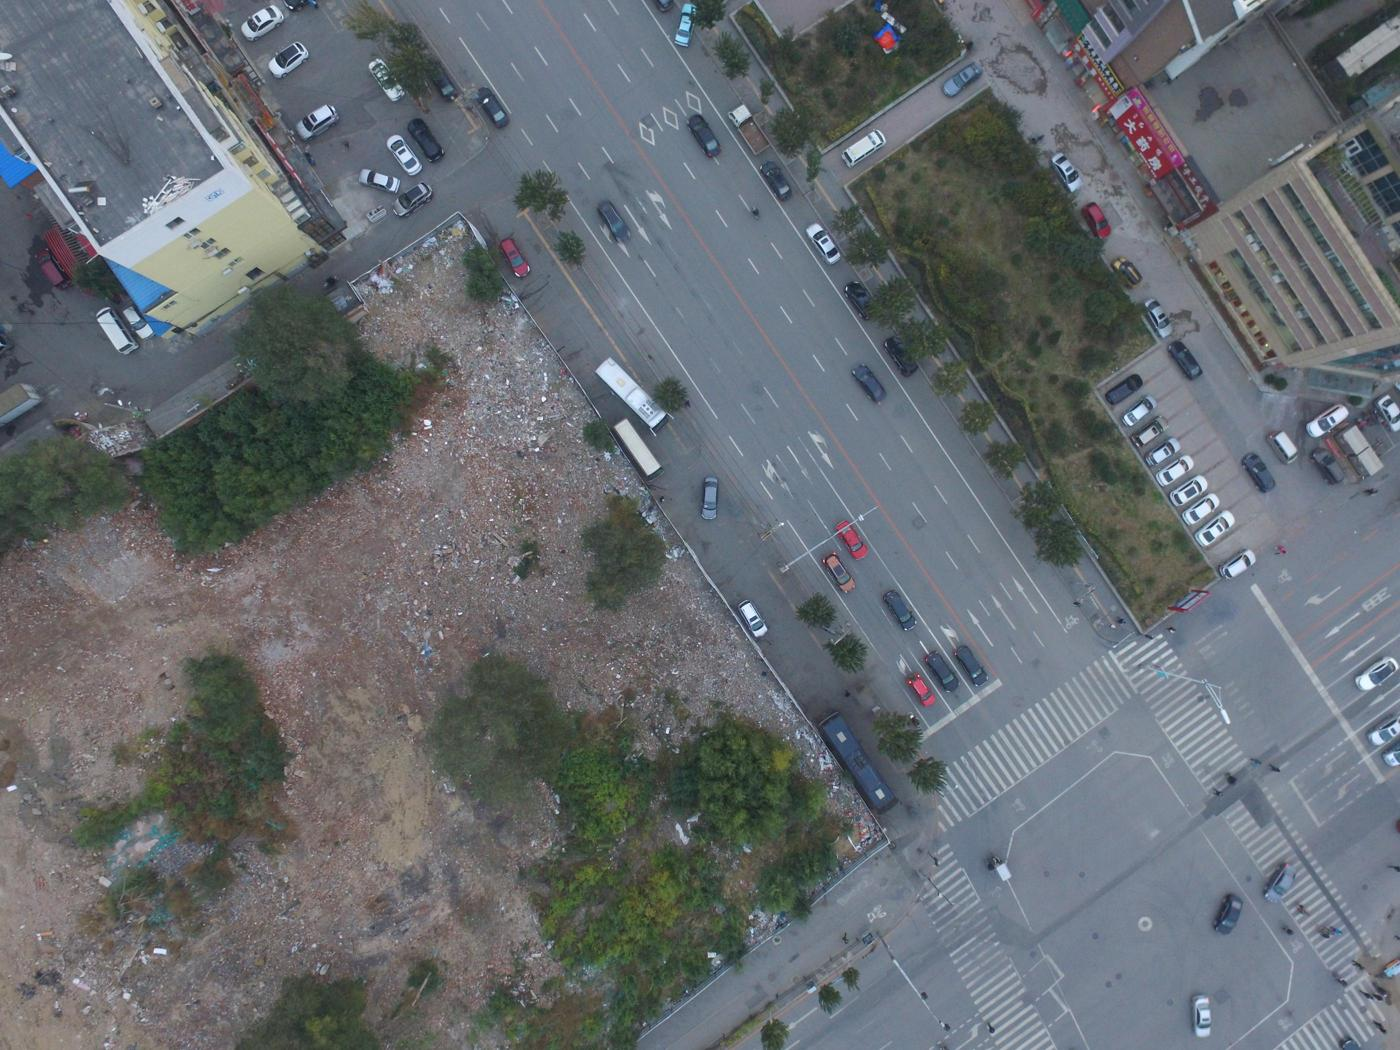

In [19]:
visdrone_ds[datasets.Split.TRAIN][0]['image']

In [26]:
s3_path = 's3://armory-library-data/visdrone2020/'
ds.save_to_disk(s3_path, max_shard_size="1GB")

Saving the dataset (0/2 shards):   0%|          | 0/6471 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/548 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1610 [00:00<?, ? examples/s]

In [30]:
!aws s3 ls $s3_path --recursive --human-readable

2023-12-22 16:50:29   43 Bytes visdrone2020/dataset_dict.json
2023-12-22 16:57:16  300.0 MiB visdrone2020/test/data-00000-of-00001.arrow
2023-12-22 16:58:25    1.7 KiB visdrone2020/test/dataset_info.json
2023-12-22 16:58:25  250 Bytes visdrone2020/test/state.json
2023-12-22 16:50:29  742.1 MiB visdrone2020/train/data-00000-of-00002.arrow
2023-12-22 16:53:31  749.5 MiB visdrone2020/train/data-00001-of-00002.arrow
2023-12-22 16:56:57    1.7 KiB visdrone2020/train/dataset_info.json
2023-12-22 16:56:57  309 Bytes visdrone2020/train/state.json
2023-12-22 16:56:58   79.2 MiB visdrone2020/validation/data-00000-of-00001.arrow
2023-12-22 16:57:16    1.7 KiB visdrone2020/validation/dataset_info.json
2023-12-22 16:57:16  250 Bytes visdrone2020/validation/state.json


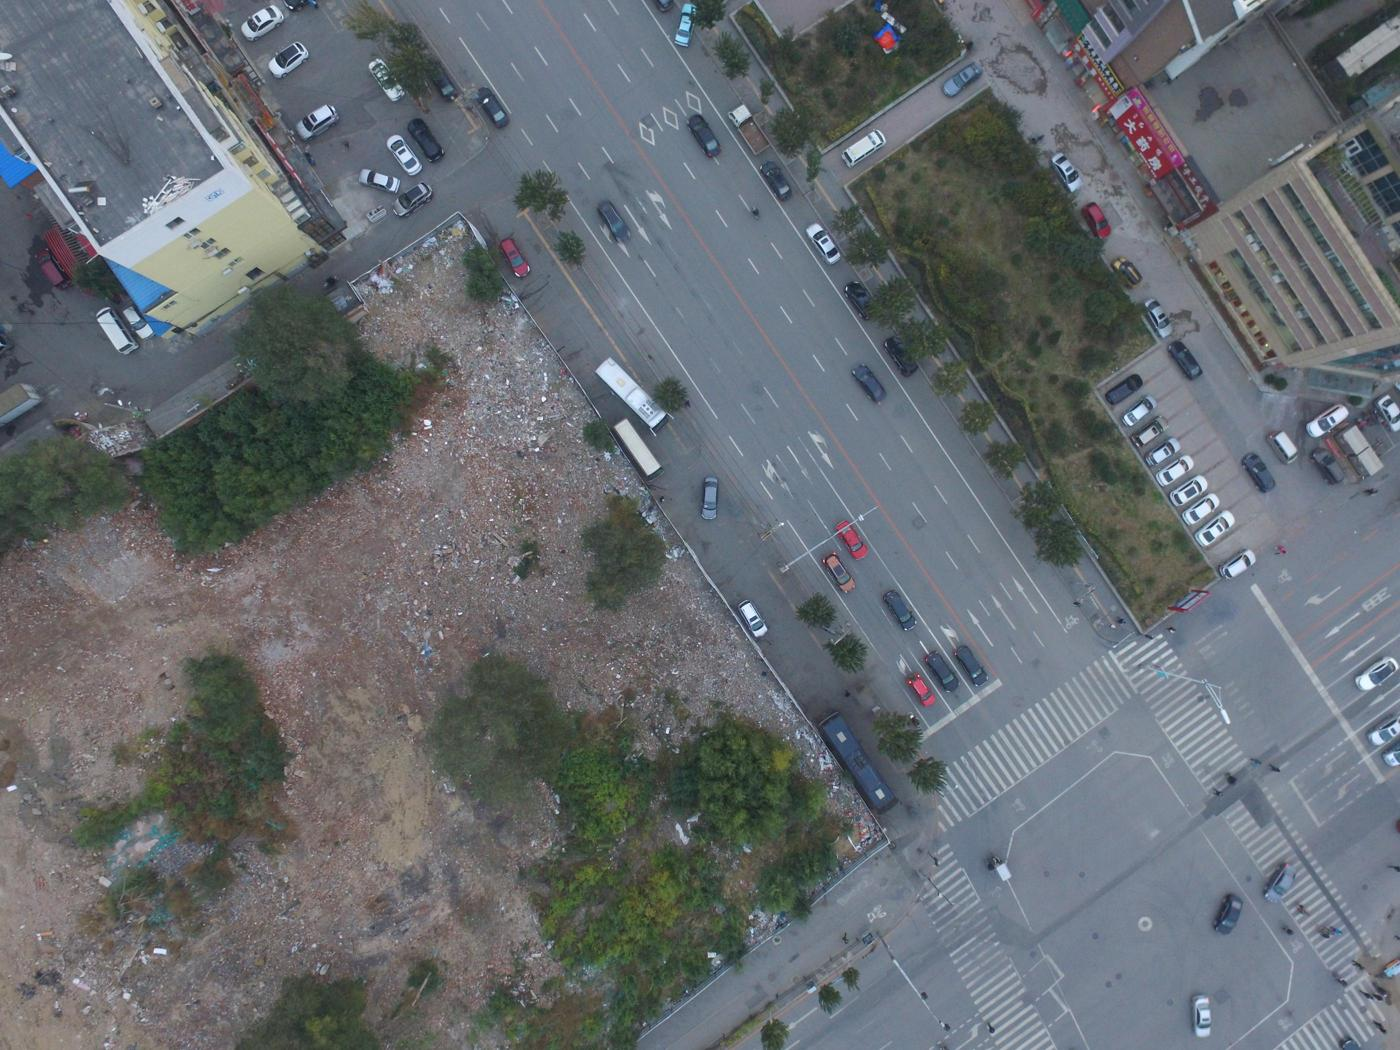

In [27]:
datasets.load_from_disk(s3_path)
ds[datasets.Split.TRAIN][0]['image']